# Predict a doctor's fee

# Load and take a look at the data

In [72]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [73]:
# Load data
ds=pd.read_csv('Doctor_Train.csv')
ds_test=pd.read_csv('Doctor_Test.csv')
ds_sample=pd.read_csv('Flight_Sample_submission.csv')

In [74]:
ds.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [75]:
ds_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [76]:
ds.shape

(5961, 7)

In [77]:
ds_test.shape


(1987, 6)

In [78]:
ds_sample.shape

(2671, 1)

Since the test and the sample datasets are not equal in length there is no way to connect the two with any certainty. 

The train_Test split will therefore be done with the regular ds only and a prediction made with the test set after the same alterations were made to it that were made on the regular ds to train the model with.

In [79]:
ds.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

# Check and treat null values

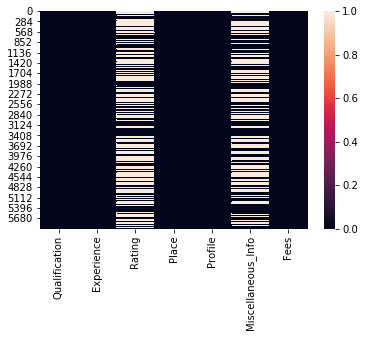

In [80]:
sns.heatmap(ds.isnull())

In [81]:
ds.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [82]:
# count the amounts of given entries in a column
ds['Rating'].value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
92%      66
90%      66
91%      60
89%      42
88%      41
85%      27
82%      23
86%      21
83%      21
80%      19
77%      16
87%      14
84%      13
79%      13
67%      12
81%      12
71%       9
76%       9
73%       8
75%       8
60%       7
74%       7
78%       6
56%       5
68%       5
69%       4
70%       4
72%       3
57%       3
62%       2
64%       2
63%       2
33%       2
55%       2
36%       1
47%       1
65%       1
7%        1
40%       1
45%       1
53%       1
48%       1
58%       1
Name: Rating, dtype: int64

Decide to fill the null values with mean values.

In [83]:
# Remove the % symbol and change the data type to float
ds['Rating'] = ds['Rating'].str.rstrip('%').astype('float')

In [84]:
ds['Rating'].head()

0    100.0
1     98.0
2      NaN
3      NaN
4    100.0
Name: Rating, dtype: float64

In [85]:
# Fill nulol values with the mean
ds['Rating'].fillna(ds['Rating'].mean(),inplace=True)

In [86]:
ds['Rating'].head()

0    100.000000
1     98.000000
2     94.643475
3     94.643475
4    100.000000
Name: Rating, dtype: float64

In [87]:
# count the amounts of given entries in a column
ds['Miscellaneous_Info'].value_counts()

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                      40
Tooth Extraction Dental Fillings Scaling / Polishing                                    12
Dental Fillings Zirconia Crowns Dental Implant Fixing                                   12
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment     9
Skin Allergy Treatment Skin Allergies Dermabrasion                                       9
                                                                                        ..
73% 3 Feedback Kaggadasapura, Bangalore                                                  1
Mayur Vihar Ph-I, Delhi ₹500 Visits Tomorrow                                             1
93% 4 Feedback Bannerghatta Road, Bangalore                                              1
95% 10 Feedback Elamakkara, Ernakulam                                                    1
PCOD Fibro adenoma Kidney Stone Treatment                                                1

Fill null values with none.

In [88]:
ds['Miscellaneous_Info']= ds['Miscellaneous_Info'].replace(np.nan, 'None', regex=True)

In [89]:
ds.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100.000000,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98.000000,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,94.643475,"Mathikere - BEL, Bangalore",ENT Specialist,None,300
3,"BSc - Zoology, BAMS",12 years experience,94.643475,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100.000000,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [90]:
ds.isnull().sum()

Qualification          0
Experience             0
Rating                 0
Place                 25
Profile                0
Miscellaneous_Info     0
Fees                   0
dtype: int64

In [91]:
# Remove all rows with null values from dataset
ds=ds.dropna()

In [92]:
ds.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

In [93]:
ds.shape

(5936, 7)

In [94]:
ds_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [139]:
# Remove all rows with null values from dataset
dst=ds_test.dropna()

In [154]:
# Remove the % symbol and change the data type to float
dst['Rating'] = dst['Rating'].str.rstrip('%').astype('float')

In [140]:
dst.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

# Summary statistics

In [98]:
ds.describe()

,Rating,Fees
count,5936.000000,5936.000000
mean,94.643475,308.811995
std,5.255238,190.851554
min,7.000000,5.000000
25%,94.643475,150.000000
50%,94.643475,300.000000
75%,96.000000,500.000000
max,100.000000,950.000000


# Data visualizations

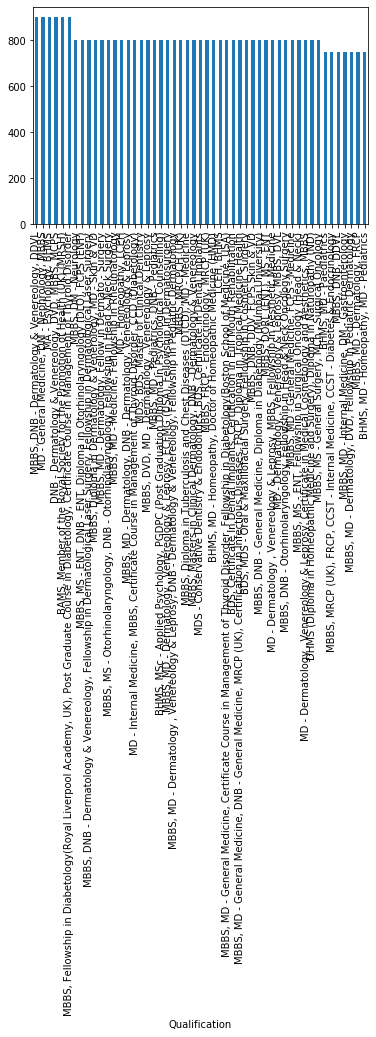

In [99]:
# Show mean price by source
ds.groupby('Qualification')['Fees'].mean().sort_values(ascending=False).head(51).plot.bar()

Qualifications have a definite effect on the average fees.

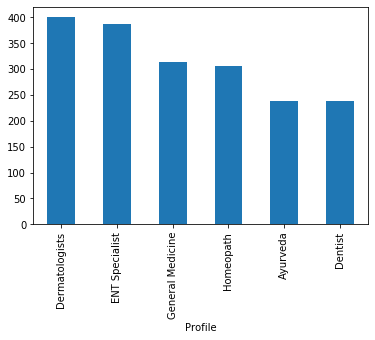

In [100]:
# Show mean price by profile
ds.groupby('Profile')['Fees'].mean().sort_values(ascending=False).head(51).plot.bar()

Dermatologists charge the highest fees ans Ayurvedists and dentists the lowest fees.

# Encode categorical columns to numeric values

In [155]:
eds=ds

In [156]:
eds2=dst

In [157]:
eds.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [158]:
eds.dtypes

Qualification           int32
Experience              int32
Rating                float64
Place                   int32
Profile                 int32
Miscellaneous_Info      int32
Fees                    int64
dtype: object

In [159]:
eds2.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [160]:
# Change categorical data to numerical data for categoriacl columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Qualification', 'Experience', 'Place', 'Profile','Miscellaneous_Info']
for col in cols:
    eds[col] = le.fit_transform(eds[col])

In [161]:
# Change categorical data to numerical data for categoriacl columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Qualification', 'Experience', 'Place', 'Profile','Miscellaneous_Info']
for col in cols:
    eds2[col] = le.fit_transform(eds2[col])

In [162]:
eds.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401,16,100.000000,299,5,130,100
1,73,3,98.000000,866,0,1422,350
2,1134,63,94.643475,457,3,2504,300
3,464,3,94.643475,68,0,1695,250
4,10,12,100.000000,337,0,253,250


In [163]:
eds2.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
2,168,33,70.0,144,2,124
4,50,6,100.0,161,1,705
5,49,4,90.0,343,1,566
6,218,14,94.0,92,3,323
7,68,51,94.0,21,1,773


# Check correlation after encoding

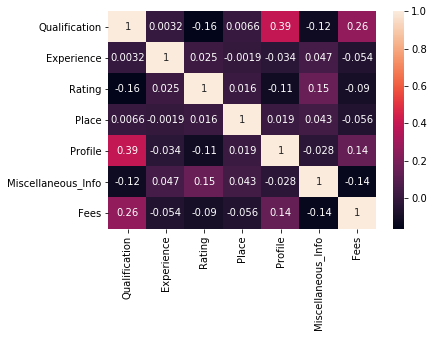

In [164]:
dscor=eds.corr()
sns.heatmap(dscor, annot=True)

Qualification correlates best with the target column.
Profile correlates second best with the target column.
Place and experiene correlate third best but poorly.
The rest don't correlate.

# Drop irrelevant columns

In [165]:
eds.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [166]:
# Drop irrelevant (poorly correlated) columns - dataset renamed to nds (new dataset)
nds=eds

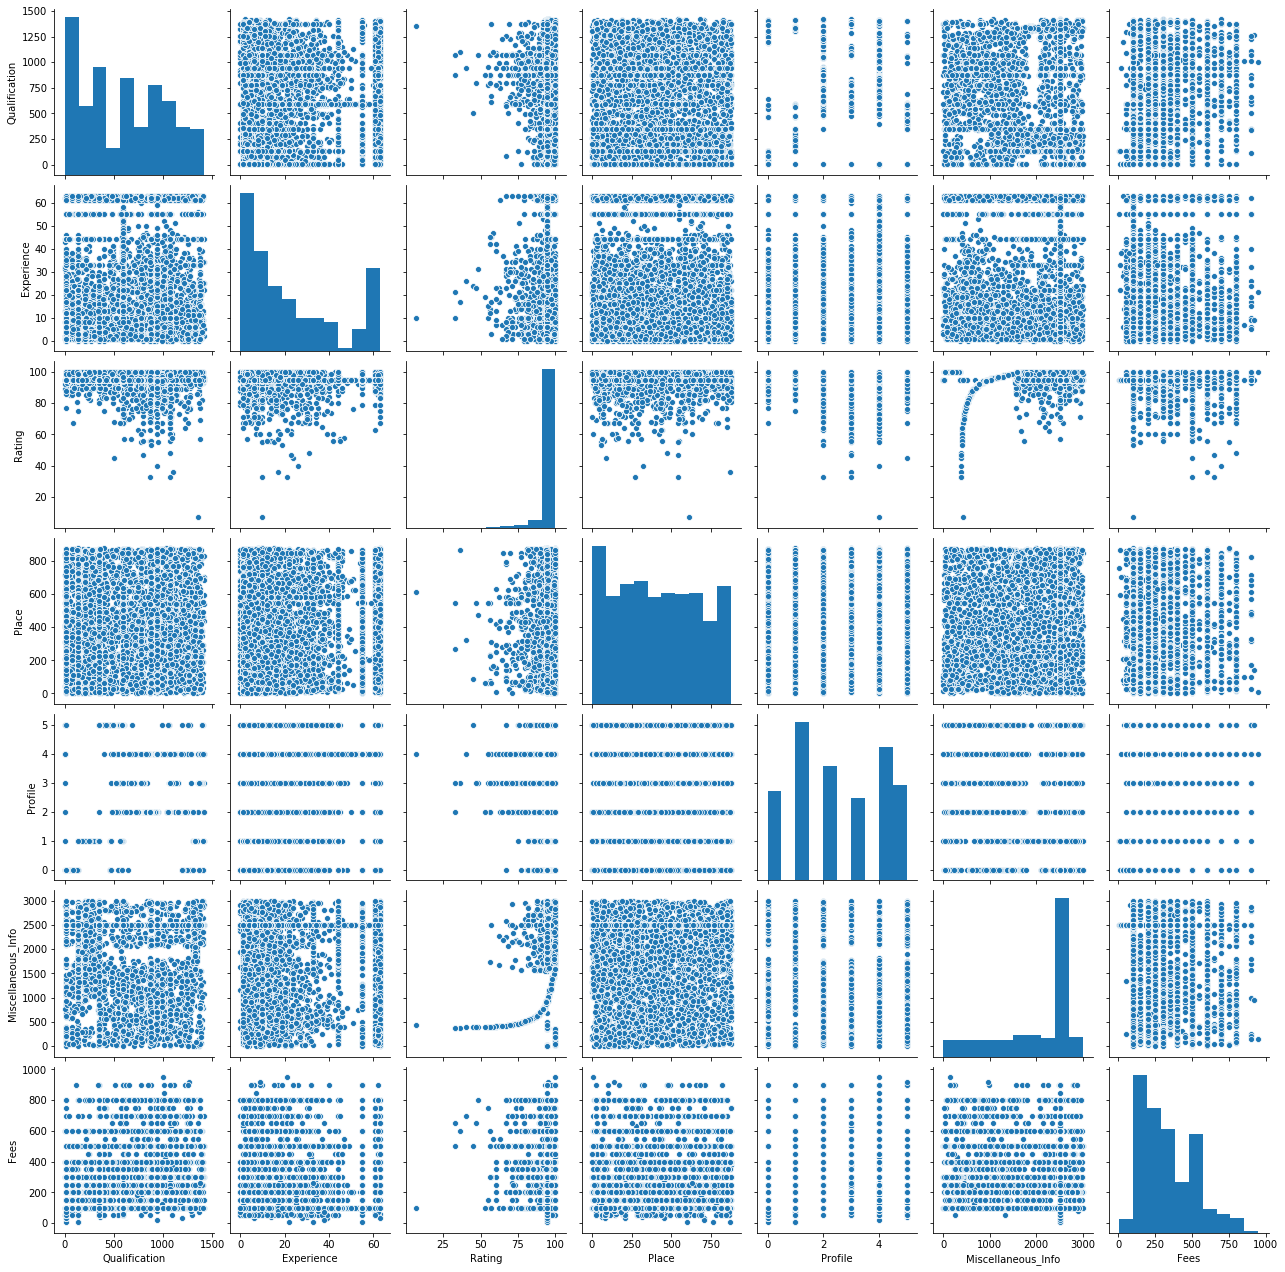

In [167]:
# Checking pairplots
sns.pairplot(nds)
plt.show()

# Find and remove outliers

In [168]:
nds.shape

(5936, 7)

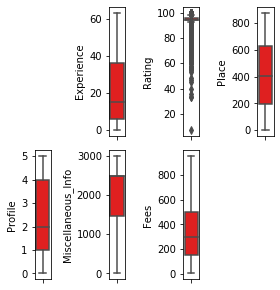

In [169]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=4
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

In [170]:
# Remove outliers - dataset renamed to cds (clean dataset)
from scipy import stats
from scipy.stats import zscore

z_score=abs(zscore(nds))
print(nds.shape)
cds=nds.loc[(z_score<3).all(axis=1)]
print(cds.shape)

(5936, 7)
(5791, 7)


In [171]:
# Remove outliers from test set
from scipy import stats
from scipy.stats import zscore

z_score=abs(zscore(eds2))
print(eds2.shape)
cds_test=eds2.loc[(z_score<3).all(axis=1)]
print(cds_test.shape)

(875, 6)
(845, 6)


# Check and adjust skewness

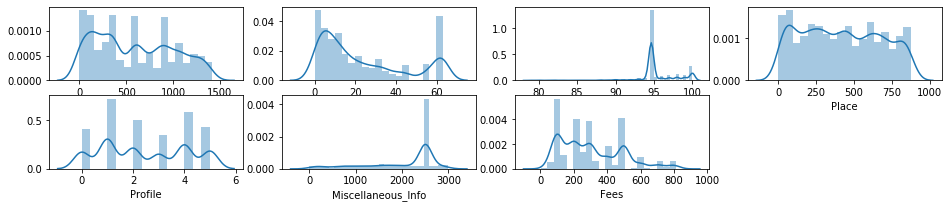

In [172]:
# Show distribution plots for all columns
collist=cds.columns.values
ncol=4
nrows=10

plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(cds[collist[i]])

In [173]:
# Show skewness (less than 0.55 is ok)
cds.skew()

Qualification         0.271043
Experience            0.814925
Rating               -1.534696
Place                 0.113495
Profile               0.123994
Miscellaneous_Info   -1.104728
Fees                  0.720664
dtype: float64

In [174]:
#Treat skewness using log
for col in cds.columns:
    if cds.skew().loc[col]>0.55:
        cds[col]=np.log1p(cds[col])

In [175]:
cds.skew()

Qualification         0.271043
Experience           -0.331354
Rating               -1.534696
Place                 0.113495
Profile               0.123994
Miscellaneous_Info   -1.104728
Fees                 -0.311837
dtype: float64

In [176]:
cds_test.skew()

Qualification         0.195950
Experience            0.923452
Rating               -1.680921
Place                 0.052766
Profile               0.438485
Miscellaneous_Info   -0.104555
dtype: float64

# Split data into x and y

In [177]:
cds.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [178]:
# Lineup target and input values
cds_x=cds.drop(columns=['Fees'])
y=cds[['Fees']]

# Apply scaler

In [179]:
#Scaling for linear regression
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(cds_x)
x=pd.DataFrame(x,columns=cds_x.columns)

In [180]:
x.skew()

Qualification         0.271043
Experience           -0.331354
Rating               -1.534696
Place                 0.113495
Profile               0.123994
Miscellaneous_Info   -1.104728
dtype: float64

In [181]:
#Scaling for linear regression
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
testx=sc.fit_transform(cds_test)
testx=pd.DataFrame(testx,columns=cds_test.columns)

# Train-Test split

In [182]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=55, test_size=0.20)

# Model

In [183]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.externals import joblib
from sklearn import linear_model

In [184]:
# Use Gradient Boosting technique with GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [185]:
# Use CrossValScore with Gradient Boosting to check r2 mean and standard deviation
gbr=GradientBoostingRegressor(learning_rate= 0.1, n_estimators=500)
print('Mean r2 score for GradientBoosting Regression:', cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for GradientBoosting Regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for GradientBoosting Regression: 0.18510742655722986
Standard deviation in r2 score for GradientBoosting Regression: 0.038985424773396116


In [186]:
gbr.fit(x,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

I choose the LinearRegression model because it has the best score

Mean r2 score for GradientBoosting Regression:18.5
Standard deviation in r2 score for GradientBoosting Regression: 3.9

The scores are very low which indicates that the parameters collected are not good indicators of what a doctor will charge.

# Save the model

In [187]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(gbr,'Doctors_Fee.pkl')

['Doctors_Fee.pkl']

In [188]:
# Load and use model to make a prediction
model=joblib.load('Doctors_Fee.pkl')
model.predict(testx)

array([5.43175339, 5.33485981, 5.61124652, 5.41957904, 5.71611913,
       5.24536571, 5.98516839, 5.92659416, 5.71058209, 5.67493849,
       5.84707739, 5.50863963, 5.55527519, 5.3402135 , 5.37526113,
       5.53899038, 5.71694553, 5.20370369, 5.69707821, 5.53612738,
       5.78940178, 5.22575102, 5.35787218, 6.00750849, 5.6197543 ,
       5.92927441, 5.72383161, 5.48876721, 5.82858526, 6.05076729,
       5.74172827, 5.20385582, 5.36046245, 5.744187  , 5.72977296,
       5.78398137, 5.72412012, 5.45750652, 5.67834356, 5.51503644,
       5.79502405, 4.64191665, 5.64658131, 5.74907623, 5.9159668 ,
       5.20571047, 5.21113525, 5.3934461 , 5.48305595, 5.82976533,
       5.61151436, 5.61280077, 5.08208363, 5.49053984, 5.93246414,
       5.47207602, 5.66949012, 5.88141464, 5.89154966, 5.65268742,
       5.58223701, 5.31944173, 5.70431627, 5.33073761, 5.44996529,
       5.11274781, 5.41970686, 5.00023486, 5.42016909, 5.20966472,
       5.89714102, 5.68866284, 5.9145942 , 5.71873957, 4.53344